In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataframe=pd.read_csv('placement.csv')
dataframe.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
dataframe.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [4]:
dataframe.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
dataframe.shape

(1000, 3)

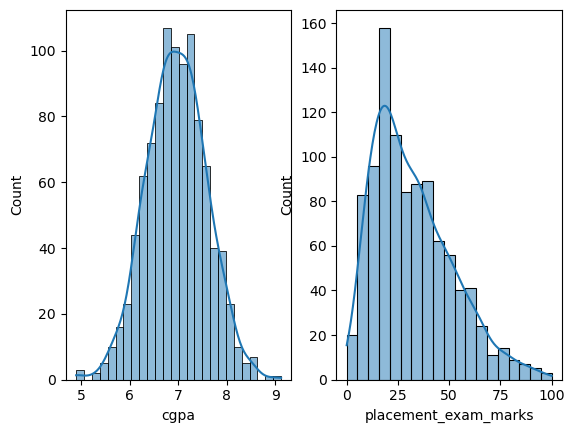

In [9]:
plt.subplot(1,2,1)
sns.histplot(dataframe['cgpa'],kde=True)
plt.subplot(1,2,2)
sns.histplot(dataframe['placement_exam_marks'],kde=True)
plt.show()

### ceiling values of cgpa

In [8]:
print(dataframe['cgpa'].mean())
print(dataframe['cgpa'].std())

6.96124
0.6158978751323894


In [7]:
print(dataframe['cgpa'].max(),dataframe['cgpa'].min())

9.12 4.89


In [6]:
#upper bounds
maxvalue=dataframe['cgpa'].mean()+3*dataframe['cgpa'].std()
minvalue=dataframe['cgpa'].mean()-3*dataframe['cgpa'].std()
maxvalue,minvalue

(8.808933625397168, 5.113546374602832)

#### outlier detection

In [9]:
dataframe[(dataframe['cgpa']>maxvalue) | (dataframe['cgpa']<minvalue)] # always use bitwise or to operate in dataframe

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#### new data storage- Trimming

In [10]:
newdata=dataframe[(dataframe['cgpa']>minvalue) & (dataframe['cgpa']<maxvalue)]
newdata.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### calculation of Z score-method 2

In [11]:
newdata['Z_score_cgpa']=newdata['cgpa'].apply(lambda X : (X-newdata['cgpa'].mean())/(newdata['cgpa'].std()))

C:\Users\Dell\AppData\Local\Temp\ipykernel_7824\3727017193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Z_score_cgpa']=newdata['cgpa'].apply(lambda X : (X-newdata['cgpa'].mean())/(newdata['cgpa'].std()))


In [12]:
newdata

,cgpa,placement_exam_marks,placed,Z_score_cgpa
0,7.19,26.0,1,0.377687
1,7.46,38.0,1,0.827626
2,7.54,40.0,1,0.960941
3,6.42,8.0,1,-0.905471
4,7.23,17.0,0,0.444345
...,...,...,...,...
991,7.04,57.0,0,0.127721
992,6.26,12.0,0,-1.172102
993,6.73,21.0,1,-0.388875
994,6.48,63.0,0,-0.805485


In [14]:
newdata[newdata['Z_score_cgpa']>3]

,cgpa,placement_exam_marks,placed,Z_score_cgpa


#### Suppose in our data we want to remove outliers from -2 and 2 then trimming techniques below is applied

In [19]:
newdata[(newdata['Z_score_cgpa']>-2) & (newdata['Z_score_cgpa']<2)]

,cgpa,placement_exam_marks,placed,Z_score_cgpa
0,7.19,26.0,1,0.377687
1,7.46,38.0,1,0.827626
2,7.54,40.0,1,0.960941
3,6.42,8.0,1,-0.905471
4,7.23,17.0,0,0.444345
...,...,...,...,...
990,6.17,33.0,1,-1.322081
991,7.04,57.0,0,0.127721
992,6.26,12.0,0,-1.172102
993,6.73,21.0,1,-0.388875
